# ID3

(569, 33)
  


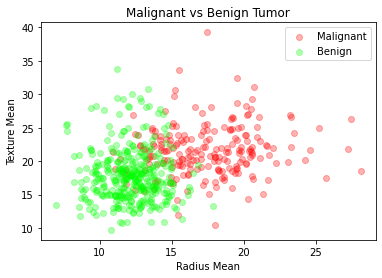

0.935672514619883


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# The sharable Link
link = 'https://drive.google.com/file/d/1MBQ9zqolIxxmHeBPyUvnu0Kri909izv8'

# Get id from link
fluff, id = link.split('d/')
#print (id)

# Get File from Gdrive
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('breast_cancer.csv')

dataset= pd.read_csv("breast_cancer.csv")

print(dataset.shape)
dataset.head(10)
print("  ")


dataset = dataset.drop(["id"], axis = 1)
dataset = dataset.drop(["Unnamed: 32"], axis = 1)

M = dataset[dataset.diagnosis == "M"]
B = dataset[dataset.diagnosis == "B"]

plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")

plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()

plt.show()

dataset.diagnosis = [1 if i == "M" else 0 for i in dataset.diagnosis]
x = dataset.drop(["diagnosis"], axis = 1)
y = dataset.diagnosis.values
x = (x - np.min(x)) / (np.max(x) - np.min(x))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print(dt.score(x_test, y_test))